# Python演習課題8
※コードを実行する際は，▶ ボタンをクリックするか，ShiftキーとEnterキーを同時に押してください．

※<code>[ア]</code>や<code>[イ]</code>などにコードを記入する際は，角括弧（[]）は削除してください．

**課題①** \\
以下のコードは，URLから画像を読み込み表示するプログラムです．<br>
コード内の<code>[ア][イ]</code>を埋め，適切に動作するようにしてください．<br>
ただし，表示する画像は<b>複数の人物の顔が写っているカラー画像</b>を使用してください．（WEB上から好きな画像を探し，そのURLを使用して問題ありません）

<ipython-input-5-9f8e85a50c1e>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


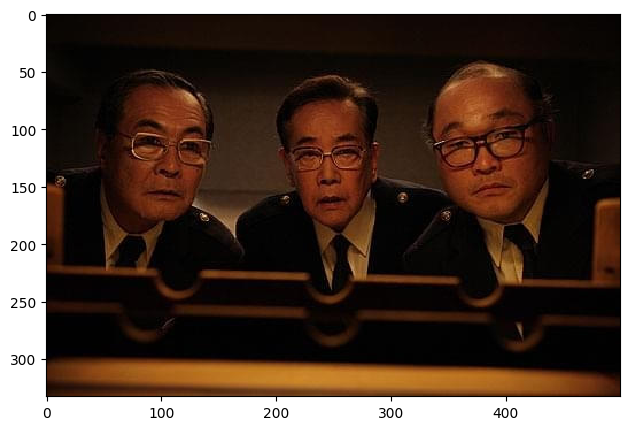

In [ ]:
from skimage import io

#画像の読み込み
img = io.imread('https://eiga.k-img.com/images/buzz/113121/43f9da0bb42f543c/640.jpg?1728620664')

#画像の表示
io.imshow(img)

**課題②** \\
以下のコードは，カラー画像を読み込み，グレースケール画像に変換して表示するプログラムです．<br>
コード内の <code>[ウ]</code> を埋め，適切に動作するようにしてください．<br>
ただし，<code>[ア]</code> には課題①と同じものが入り，<code>[イ]</code>については課題①と同じような方法で<code>gray_img</code>を表示をします．

<ipython-input-9-d7ffc7b892e0>:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray_img)


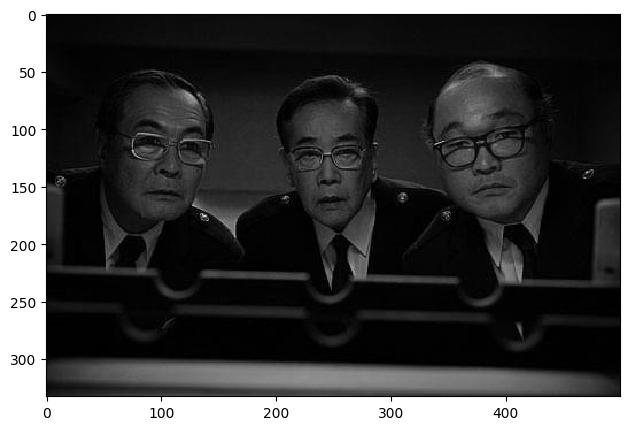

In [ ]:
from skimage.color import rgb2gray
#from skimage import io
from skimage import color # colorを定義しないとcolor.rgb2gray( )が実行できないはず...

#画像の読み込み
img = io.imread('https://eiga.k-img.com/images/buzz/113121/43f9da0bb42f543c/640.jpg?1728620664')

#グレースケール画像へ変換
gray_img = color.rgb2gray(img)

#グレースケール画像の表示
io.imshow(gray_img)

**課題③** \\
以下のコードは，カラー画像中の人物の顔を検出をして，カラー画像に矩形を描画して表示するプログラムです． <br>
コード内の<code>[エ]～[サ]</code>を埋め，適切に動作するようにしてください．<br>
ただし，<b>複数の人物の顔が写っているカラー画像</b>を使用し，それぞれの顔に矩形が描画されるようにしてください．<br>
また，<code>[ア][イ]</code>には課題①②と同じものが入ります．<br>
（画像によってはうまく顔が検出できない場合があります．その時はdetectorの画像拡大回数の数を増やすか、ほかの画像で試してみてください．）

<ipython-input-11-86351f7b34c5>:27: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


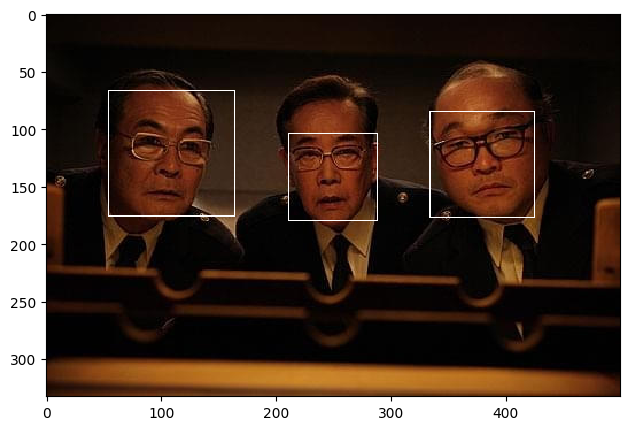

In [ ]:
from skimage import io
from skimage.draw import rectangle_perimeter as rect
import dlib

#画像の読み込み
img = io.imread('https://eiga.k-img.com/images/buzz/113121/43f9da0bb42f543c/640.jpg?1728620664')

#顔検出器の定義
detector = dlib.get_frontal_face_detector()

#顔検出
dets = detector(img, 1)

#矩形の描画
for d in dets:
  #顔の左上と右下の座標を取得
  l = d.left()   #left
  r = d.right()  #right
  t = d.top()    #top
  b = d.bottom() #bottom

  #矩形を描画（何色でも可）
  rr,cc = rect((t,l),(b,r),shape=img.shape)
  img[rr,cc] = (255,255,255)

#画像の表示
io.imshow(img)

**課題④** \\
課題③のコードを改変して，顔を囲む矩形の太さを3ピクセルで描画するようにしてください．<br>
コードの追加箇所は「#以下に顔を囲む矩形を3ピクセルの太さで描画するコードを追加」のところになり，<code>[ア][イ][エ][オ]</code>には課題③と同じものが入ります．

<ipython-input-14-442d539f8a90>:28: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


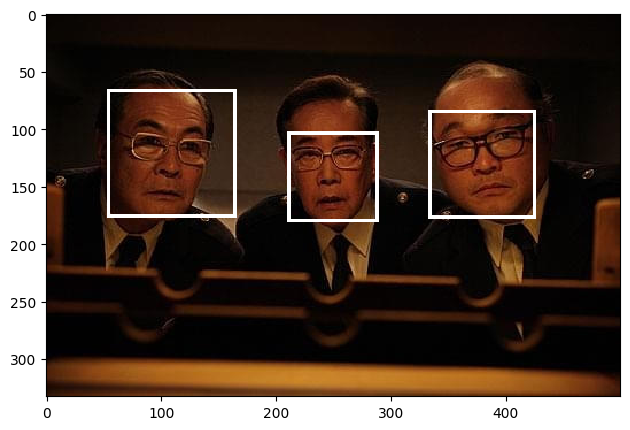

In [ ]:
from skimage import io
from skimage.draw import rectangle_perimeter as rect
import dlib

#画像の読み込み
img = io.imread('https://eiga.k-img.com/images/buzz/113121/43f9da0bb42f543c/640.jpg?1728620664')

#顔検出器の定義
detector = dlib.get_frontal_face_detector()

#顔検出
dets = detector(img, 1)

#以下に顔を囲む矩形を3ピクセルの太さで描画するコードを追加
for d in dets:
  #顔の左上と右下の座標を取得
  l = d.left()   #left
  r = d.right()  #right
  t = d.top()    #top
  b = d.bottom() #bottom

  for offset in [-1, 0, 1]: # コードを簡略化
    #矩形を描画（何色でも可）
    rr, cc = rect((t - offset, l - offset), (b + offset, r + offset), shape=img.shape)
    img[rr, cc] = (255,255,255)

#画像の表示
io.imshow(img)

**発展課題** \\
一番下のコードを編集して，画像中の人物の口にマスクを張り付けるプログラムを作成してください．<br>
マスクの画像は https://bit.ly/39rDGcm （マスク画像：無料イラスト素材集『Frame illust』）を利用します．

モジュールのインポート

In [ ]:
from skimage import io
import numpy as np
import dlib
from skimage.transform import resize

マスクの画像の読み込み

<ipython-input-16-9e6aca5bff58>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask_img[:,:,0])


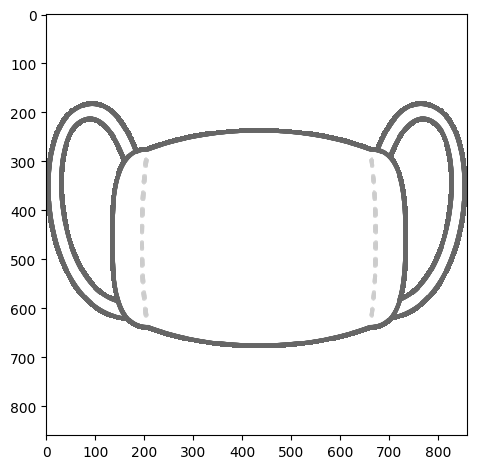

In [ ]:
mask_img=io.imread('https://bit.ly/39rDGcm')
io.imshow(mask_img[:,:,0])

#### draw_mask()関数
顔にマスクを張り付ける際に使用できます． \\

```
例) img=draw_mask(画像, マスクの画像, 中心位置)
```



In [ ]:
def draw_mask(img,mask_img,mouth_center):
  m_y,m_x=mouth_center
  h,w,_=mask_img.shape

  #座標の四捨五入
  m_y=int(m_y+0.5)
  m_x=int(m_x+0.5)

  #範囲指定
  x1, y1, x2, y2 = m_x-w//2, m_y-h//2, m_x-w//2+w, m_y-h//2+h

  #はみ出し対応
  if x1 <0:
    mask_img=mask_img[:,abs(x1):,:]
    x1=0
  if x2 >= img.shape[1]:
    mask_img=mask_img[:,:-(x2-img.shape[1]),:]
    x2=img.shape[1]
  if y1 <0 :
    mask_img=mask_img[abs(y1):,:,:]
    y1=0
  if y2 > img.shape[0]:
    mask_img=mask_img[:-(y2-img.shape[0]),:,:]
    y2=img.shape[0]

  #合成
  if np.max(mask_img)>1:
    img[y1:y2, x1:x2] = img[y1:y2, x1:x2] * (1 - mask_img[:, :, 1:] ) + (mask_img[:, :, :1]) * mask_img[:, :, 1:]
  else:
    img[y1:y2, x1:x2] = img[y1:y2, x1:x2] * (1 - mask_img[:, :, 1:] ) + (mask_img[:, :, :1]*255) * mask_img[:, :, 1:]
  return img

### draw_example使用例
以下のコードは，画像中のy=75,x=87をマスクの中央座標として，マスクを画像に描画するプログラムです．

<ipython-input-18-7283702a4cda>:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(example_img)


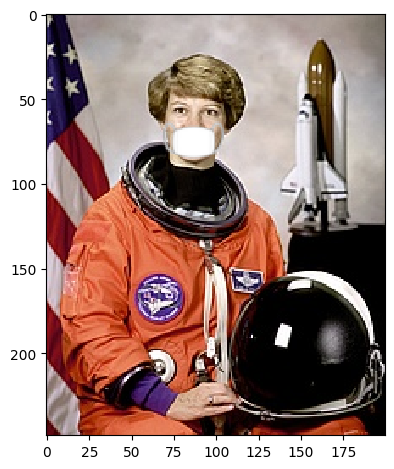

In [ ]:
example_img = io.imread('https://bit.ly/39pAu0V')
#マスクの画像のサイズを調整
mask=resize(mask_img,(36,36))

#マスクを描画
example_img = draw_mask(example_img,mask,(75,87)) #example_img:入力画像, mask:マスクの画像のサイズを調整したもの, (75,87):描画後のマスクの中央の座標

#画像を表示
io.imshow(example_img)


# この下のプログラムを作成
以下のコードは，画像中の顔に対してマスクを描画するプログラムです．<br>
マスクの描画位置は顔検出の結果を使用します．<br>
次の順序で動作します．
1. カラー画像から顔検出をする．
2. マスクの画像を顔の大きさに合わせて適切なサイズ（顔の横幅×横幅くらいがよい）に調整する．
3. マスクを張り付ける中央位置を顔画像の座標をもとに算出する．マスクの張り付ける位置の中央の座標は(x,y)=(顔の中央（横）,顔の下1/4)あたりにするとよい．

コード内の<code>[シ]～[ソ]</code>を埋め，適切に動作するようにしてください．<br>
ただし，<code>[ア]～[イ][エ]～[ケ]</code>には他の課題と同じものが入ります．

<ipython-input-29-9bd91008f2fa>:32: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(eimg)


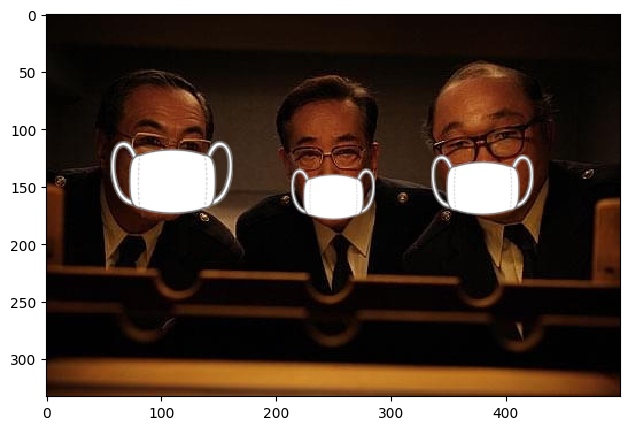

In [ ]:
#ここを編集

#画像の読み込み
img = io.imread('https://eiga.k-img.com/images/buzz/113121/43f9da0bb42f543c/640.jpg?1728620664')

#顔検出器の定義
detector = dlib.get_frontal_face_detector()

#顔検出
dets = detector(img, 1)

#矩形の描画
for d in dets:
  #顔の左上と右下の座標を取得
  l = d.left()   #left
  r = d.right()  #right
  t = d.top()    #top
  b = d.bottom() #bottom

  #マスクの大きさを顔の横幅と同じになるように調整
  mask = resize(mask_img, (r - l, b - t))

  #マスクを張り付ける中央位置の算出
  m_x = (l + r) / 2 #x座標
  # m_y = (t + b)/2 + (b - t)*(1/5)を簡略化
  m_y = (t*3 + b*7) / 10 #y座標

  #マスク画像の描画
  eimg = draw_mask(img, mask, (m_y, m_x))

#画像の表示
io.imshow(eimg)